# PCA and Horn's Parallel Analysis Wine Data

In this lab you'll practice using PCA on two datasets: heptathalon performance and the wine dataset that you have seen previously.

Horn's Parallel Analysis is a way to determine how many components you should keep after using a PCA on your data. Essentially it will tell you which of your components are likely noise which can be discarded.

---

### Load packages and heptathalon data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

---

### Load the wine data

In [2]:
wine = pd.read_csv('winequality_merged.csv')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


---

### Subset the wine data to everything except the `red_wine` column

In [4]:
wine_cont = wine.iloc[:, 0:-1]

---

### Examine the correlation between variables

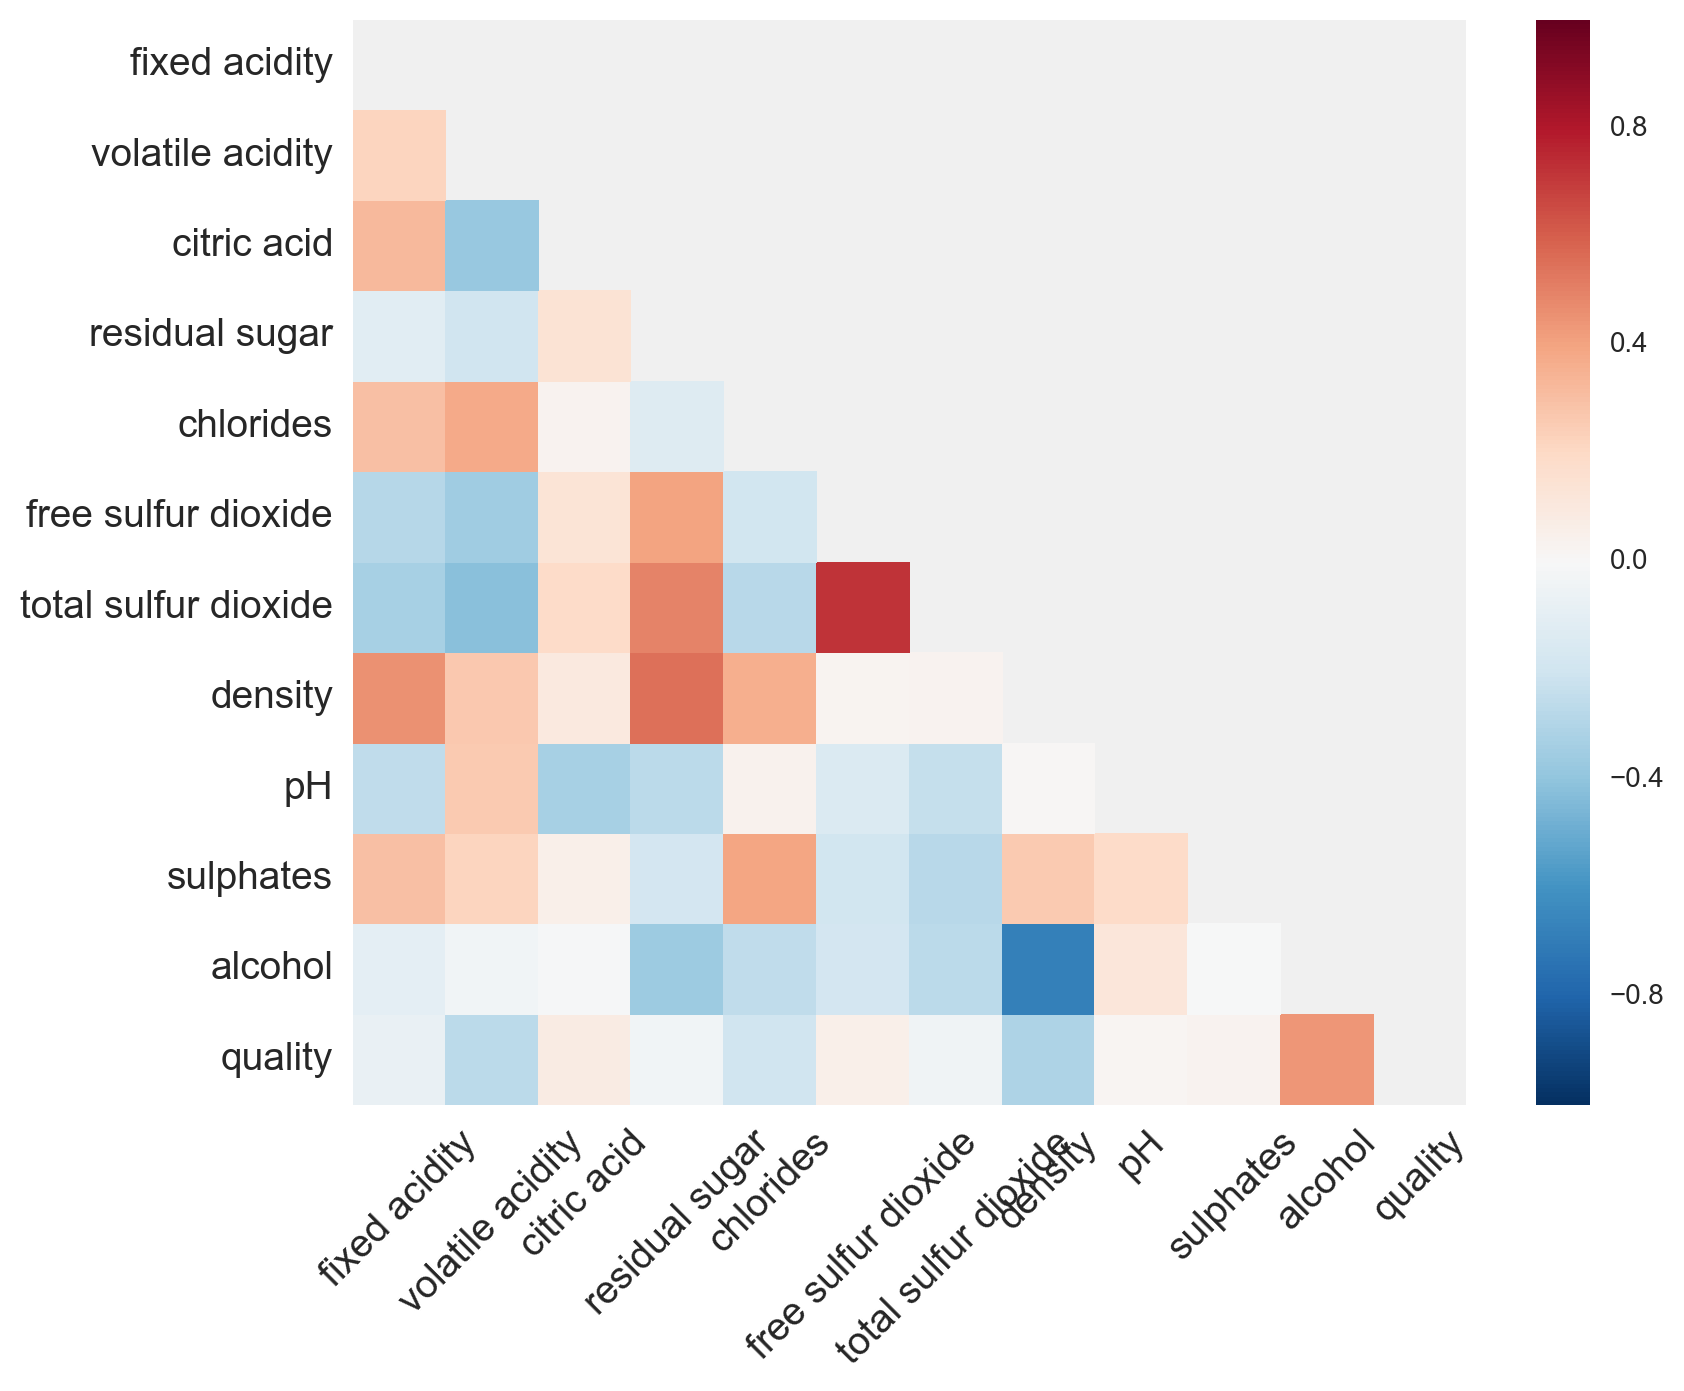

In [5]:
wine_corr = wine_cont.corr()

mask = np.zeros_like(wine_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(8,7))
ax = sns.heatmap(wine_corr, mask=mask)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

plt.show()

In [14]:
wine_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


---

### Standardize the variables

In [15]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
wine_cont_n = ss.fit_transform(wine_cont)
wine_cont_n

array([[ 0.14247327,  2.18883292, -2.19283252, ...,  0.19309677,
        -0.91546416, -0.93722961],
       [ 0.45103572,  3.28223494, -2.19283252, ...,  0.99957862,
        -0.58006813, -0.93722961],
       [ 0.45103572,  2.55330026, -1.91755268, ...,  0.79795816,
        -0.58006813, -0.93722961],
       ..., 
       [-0.55179227, -0.6054167 , -0.88525328, ..., -0.47897144,
        -0.91546416,  0.20799905],
       [-1.32319841, -0.30169391, -0.12823371, ..., -1.016626  ,
         1.9354021 ,  1.35322771],
       [-0.93749534, -0.78765037,  0.42232597, ..., -1.41986693,
         1.09691202,  0.20799905]])

In [16]:
wine.shape

(6497, 13)

---

### Fit a PCA on the standardized data

Create a new dataframe with the principal components and the `red_wine` column added back in from the original data.

In [17]:
## Fit the PCA and print the components
from sklearn.decomposition import PCA
wine_pca = PCA().fit(wine_cont_n)
print "Number of PCA components is: \n", wine_pca.n_components_
print "\n======\n"
print "List of PCA components is:\n", wine_pca.components_


Number of PCA components is: 
12


List of PCA components is:
[[-0.25692873 -0.39493118  0.14646061  0.31890519 -0.31344994  0.42269137
   0.47441968 -0.09243753 -0.20806957 -0.29985192 -0.05892408  0.08747571]
 [ 0.26184306  0.10519825  0.14409348  0.34258497  0.2697701   0.11117878
   0.14394753  0.55492047 -0.15292185  0.1196342  -0.49272747 -0.29660091]
 [ 0.46748619 -0.27968932  0.58807557 -0.0755017   0.04676921 -0.09899801
  -0.10128143 -0.05156338 -0.40678741  0.16869128  0.21293142  0.29583773]
 [-0.14396377 -0.08005785  0.05551036  0.11245623  0.16529004  0.30330631
   0.13223199  0.15057853  0.47147768  0.58801992  0.08003179  0.47243936]
 [ 0.16536261  0.14777408 -0.23462139  0.50792118 -0.3938966  -0.24845196
  -0.22396681  0.3303573  -0.0014575  -0.19324555  0.11602319  0.45912914]
 [-0.03003708  0.38266373 -0.36224839  0.06331719  0.42544212  0.28318017
   0.10676882 -0.15455292 -0.56089714  0.02014082  0.16947538  0.27788835]
 [ 0.3934353   0.4451108   0.04769762 -0.095

In [18]:
## transform  => Apply dimensionality reduction to X.
wine_pcs = wine_pca.transform(wine_cont_n)
wine_pcs

array([[-3.34843817,  0.56892617, -2.72738565, ..., -0.0691407 ,
        -0.10424905,  0.02764316],
       [-3.22859545,  1.19733465, -1.99890417, ..., -0.44915958,
        -0.2582509 , -0.01446934],
       [-3.23746833,  0.95258001, -1.7465779 , ..., -0.27288796,
        -0.0816135 ,  0.05396092],
       ..., 
       [ 0.62692235, -0.62214478, -0.14948285, ..., -0.44935488,
        -0.33788036,  0.16362679],
       [ 0.49193416, -3.75592792, -0.08028411, ..., -0.33366769,
         0.27850001,  0.059468  ],
       [ 0.76155534, -2.7678397 ,  0.17681956, ..., -0.09970173,
        -0.12137327,  0.00662108]])

In [19]:
## Now create the dataframe
wine_pcs = pd.DataFrame(wine_pcs, columns=['PC'+str(i) for i in range(1, wine_pcs.shape[1]+1)])
wine_pcs['red_wine'] = wine.red_wine

In [20]:
wine_pcs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,red_wine
0,-3.348438,0.568926,-2.727386,-0.223777,0.621408,-0.231602,0.124851,-0.000515,-0.646268,-0.069141,-0.104249,0.027643,1
1,-3.228595,1.197335,-1.998904,-0.377154,0.110313,1.945885,0.938413,0.425532,-0.114802,-0.449160,-0.258251,-0.014469,1
2,-3.237468,0.952580,-1.746578,-0.472791,0.225404,1.082561,0.451976,0.411350,-0.120635,-0.272888,-0.081613,0.053961,1
3,-1.672561,1.600583,2.856552,-0.438364,0.213093,-0.970765,0.222429,-0.279690,-1.294900,0.212574,0.120527,-0.100574,1
4,-3.348438,0.568926,-2.727386,-0.223777,0.621408,-0.231602,0.124851,-0.000515,-0.646268,-0.069141,-0.104249,0.027643,1


---

### Plot the variance explained ratio of the components

In [54]:
wine_cont.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [56]:
wine_pca.components_

array([[-0.25692873, -0.39493118,  0.14646061,  0.31890519, -0.31344994,
         0.42269137,  0.47441968, -0.09243753, -0.20806957, -0.29985192,
        -0.05892408,  0.08747571],
       [ 0.26184306,  0.10519825,  0.14409348,  0.34258497,  0.2697701 ,
         0.11117878,  0.14394753,  0.55492047, -0.15292185,  0.1196342 ,
        -0.49272747, -0.29660091],
       [ 0.46748619, -0.27968932,  0.58807557, -0.0755017 ,  0.04676921,
        -0.09899801, -0.10128143, -0.05156338, -0.40678741,  0.16869128,
         0.21293142,  0.29583773],
       [-0.14396377, -0.08005785,  0.05551036,  0.11245623,  0.16529004,
         0.30330631,  0.13223199,  0.15057853,  0.47147768,  0.58801992,
         0.08003179,  0.47243936],
       [ 0.16536261,  0.14777408, -0.23462139,  0.50792118, -0.3938966 ,
        -0.24845196, -0.22396681,  0.3303573 , -0.0014575 , -0.19324555,
         0.11602319,  0.45912914],
       [-0.03003708,  0.38266373, -0.36224839,  0.06331719,  0.42544212,
         0.28318017,  

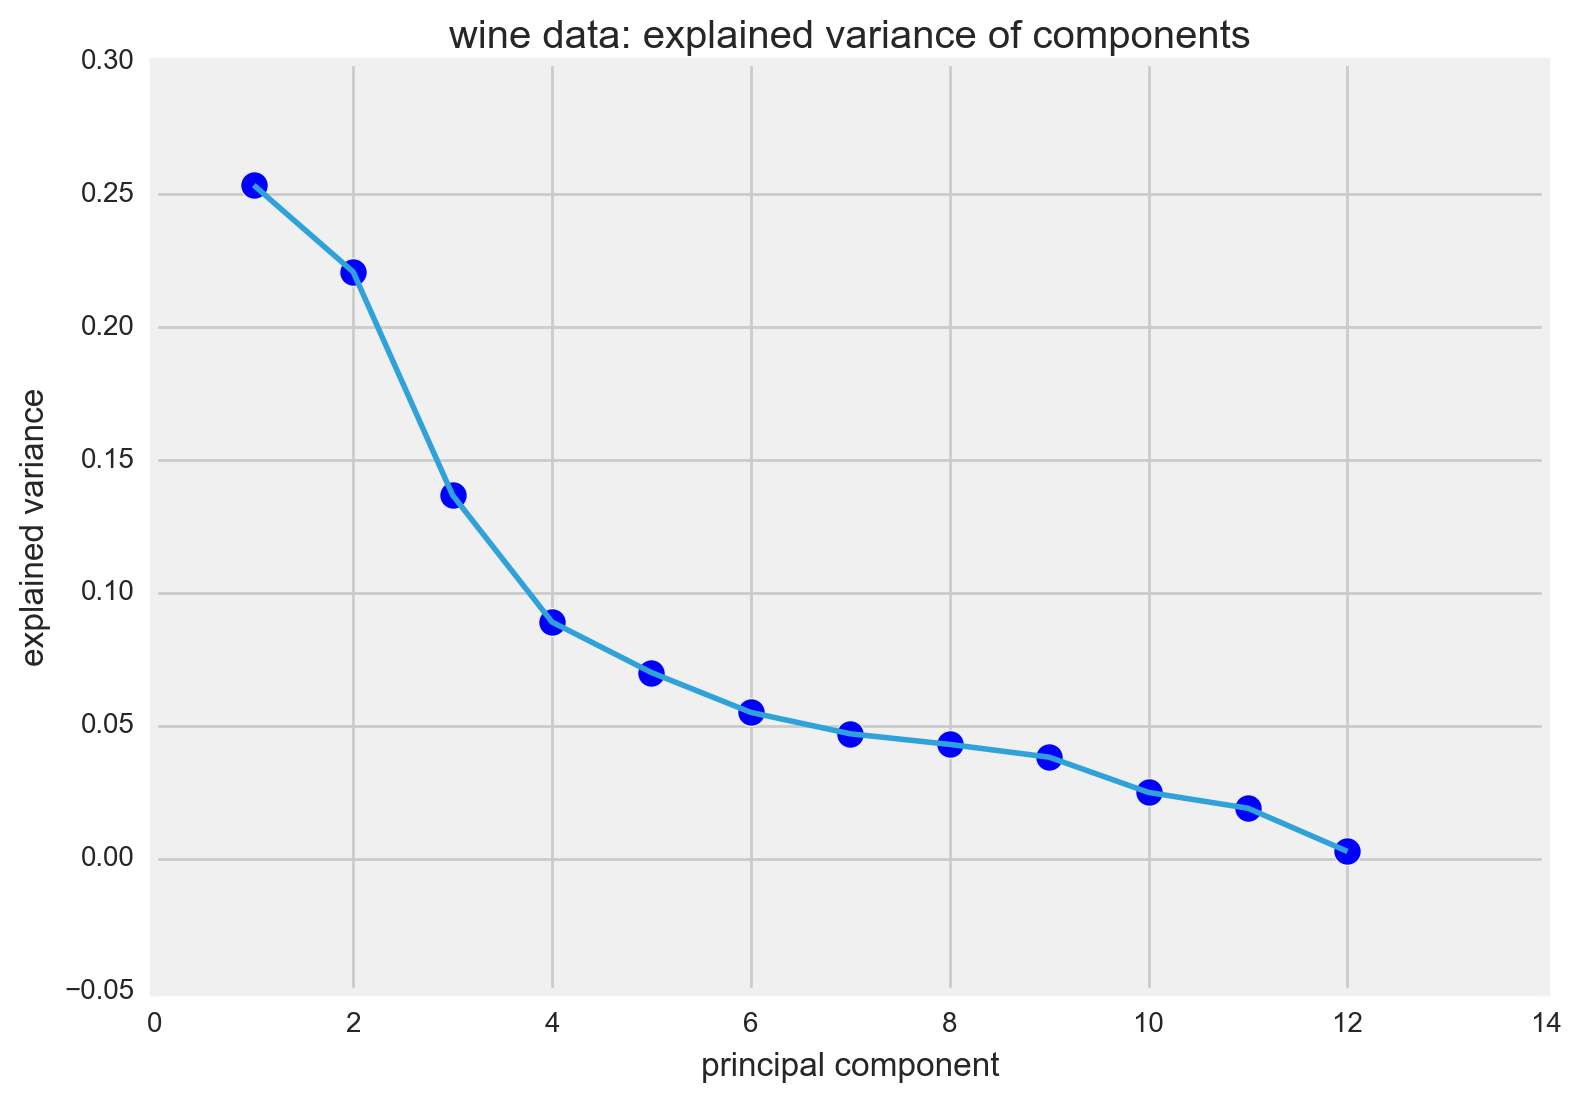

In [21]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, wine_cont.shape[1]+1), wine_pca.explained_variance_ratio_, lw=2)
ax.scatter(range(1, wine_cont.shape[1]+1), wine_pca.explained_variance_ratio_, s=100)
ax.set_title('wine data: explained variance of components')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance')
plt.show()

---

### Print out the component weights with their corresponding variables for PC1, PC2, and PC3

How would you label the components based on the weights?

In [53]:
wine_pca.components_[0]

array([-0.25692873, -0.39493118,  0.14646061,  0.31890519, -0.31344994,
        0.42269137,  0.47441968, -0.09243753, -0.20806957, -0.29985192,
       -0.05892408,  0.08747571])

In [22]:
for col, comp in zip(wine_cont.columns, wine_pca.components_[0]):
    print col, comp

fixed acidity -0.256928733111
volatile acidity -0.39493117944
citric acid 0.146460610663
residual sugar 0.318905191475
chlorides -0.313449939668
free sulfur dioxide 0.422691371567
total sulfur dioxide 0.474419684357
density -0.0924375324327
pH -0.20806956646
sulphates -0.29985191609
alcohol -0.0589240827477
quality 0.0874757097877


In [23]:
for col, comp in zip(wine_cont.columns, wine_pca.components_[1]):
    print col, comp

fixed acidity 0.261843062046
volatile acidity 0.105198251341
citric acid 0.144093484947
residual sugar 0.342584967641
chlorides 0.269770095513
free sulfur dioxide 0.111178780564
total sulfur dioxide 0.143947528574
density 0.554920473971
pH -0.152921853598
sulphates 0.1196342033
alcohol -0.49272747405
quality -0.29660090632


In [24]:
for col, comp in zip(wine_cont.columns, wine_pca.components_[3]):
    print col, comp

fixed acidity -0.143963771283
volatile acidity -0.0800578538331
citric acid 0.0555103604809
residual sugar 0.112456230601
chlorides 0.165290038786
free sulfur dioxide 0.303306311912
total sulfur dioxide 0.132231986011
density 0.150578531289
pH 0.471477676493
sulphates 0.588019919588
alcohol 0.0800317855629
quality 0.47243935985


---

### Plot a seaborn pairplot of PC1, PC2, and PC3 with `hue='red_wine'`

Do any of the components differentiate red and white wine? If so, what does this tell you about the difference between red and white wine based on the component weights?

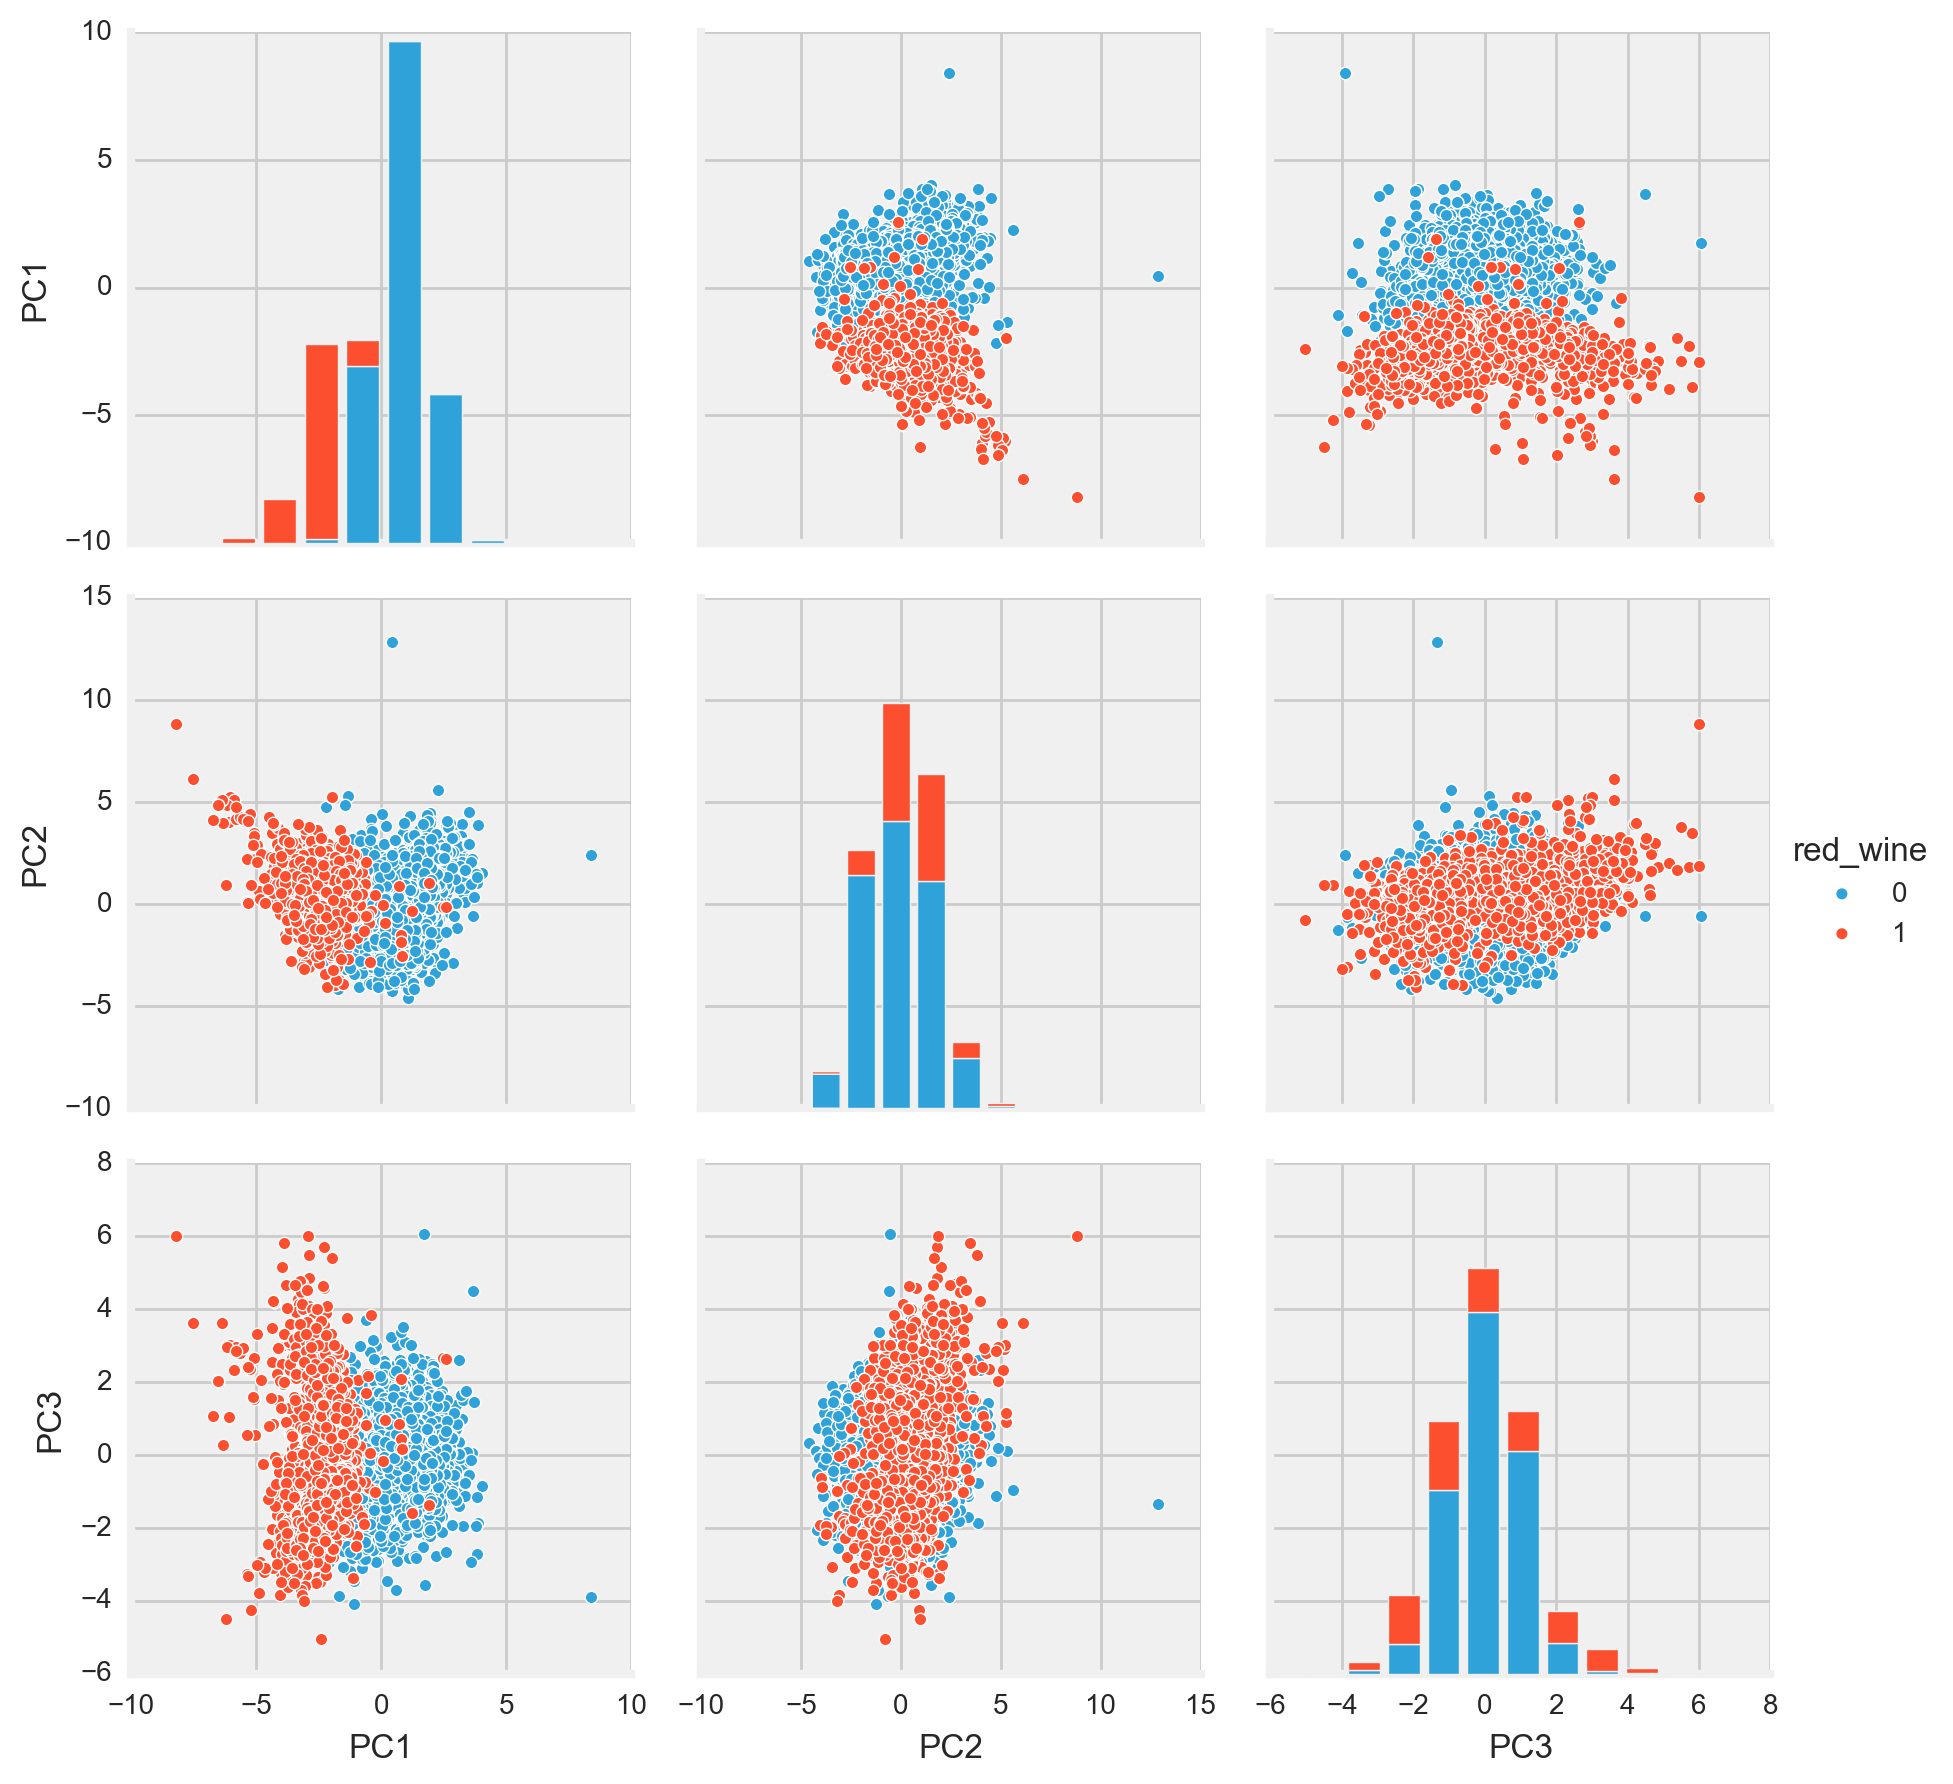

In [26]:
sns.pairplot(data=wine_pcs, vars=['PC1','PC2','PC3'], hue='red_wine', size=3)
plt.show()

In [27]:
wine_cont.shape

(6497, 12)

---

### Horn's parallel analysis

You can determine the appropriate number of components to keep by using a bootstrapping procedure known as Horn's Parallel Analysis. This is (as far as I know) the gold standard in determining which components aren't noise.

How to do the parallel analysis (pseudocode):

    for n iterations:
        create normally distributed random data the same shape as your data
        fit a PCA on the random data
        pull out the eigenvalues
    select a percentile of the eigenvalues as your threshold (0.5 = median, 0.95 = 95% confidence, etc.)
    plot the random component eigenvalues at that percentile against your data's pca eigenvalues
    components above the selected percentile are not noise, those under are
    
    
Write a function to perform the parallel analysis.

In [28]:
def horn_parallel_analysis(shape, iters=1000, percentile=95):
    pca = PCA(n_components=shape[1])
    eigenvals = []
    for i in range(iters):
        rdata = np.random.normal(0,1,size=shape)
        pca.fit(rdata)
        eigenvals.append(pca.explained_variance_)
    eigenvals = np.array(eigenvals)
    return np.percentile(eigenvals, percentile, axis=0)

---

### Run parallel analysis for the wine data

In [29]:
wine_pa = horn_parallel_analysis(wine_cont.shape, percentile=95)
wine_pa

array([ 1.09242018,  1.07137526,  1.05524978,  1.04193581,  1.02868127,
        1.01641366,  1.00533315,  0.99364204,  0.98110842,  0.9701043 ,
        0.95804974,  0.94335922])

---

### Plot the wine eigenvalues (`.variance_explained_`) against the parallel analysis random eigenvalue cutoffs

How many components are not noise, based on the chart?

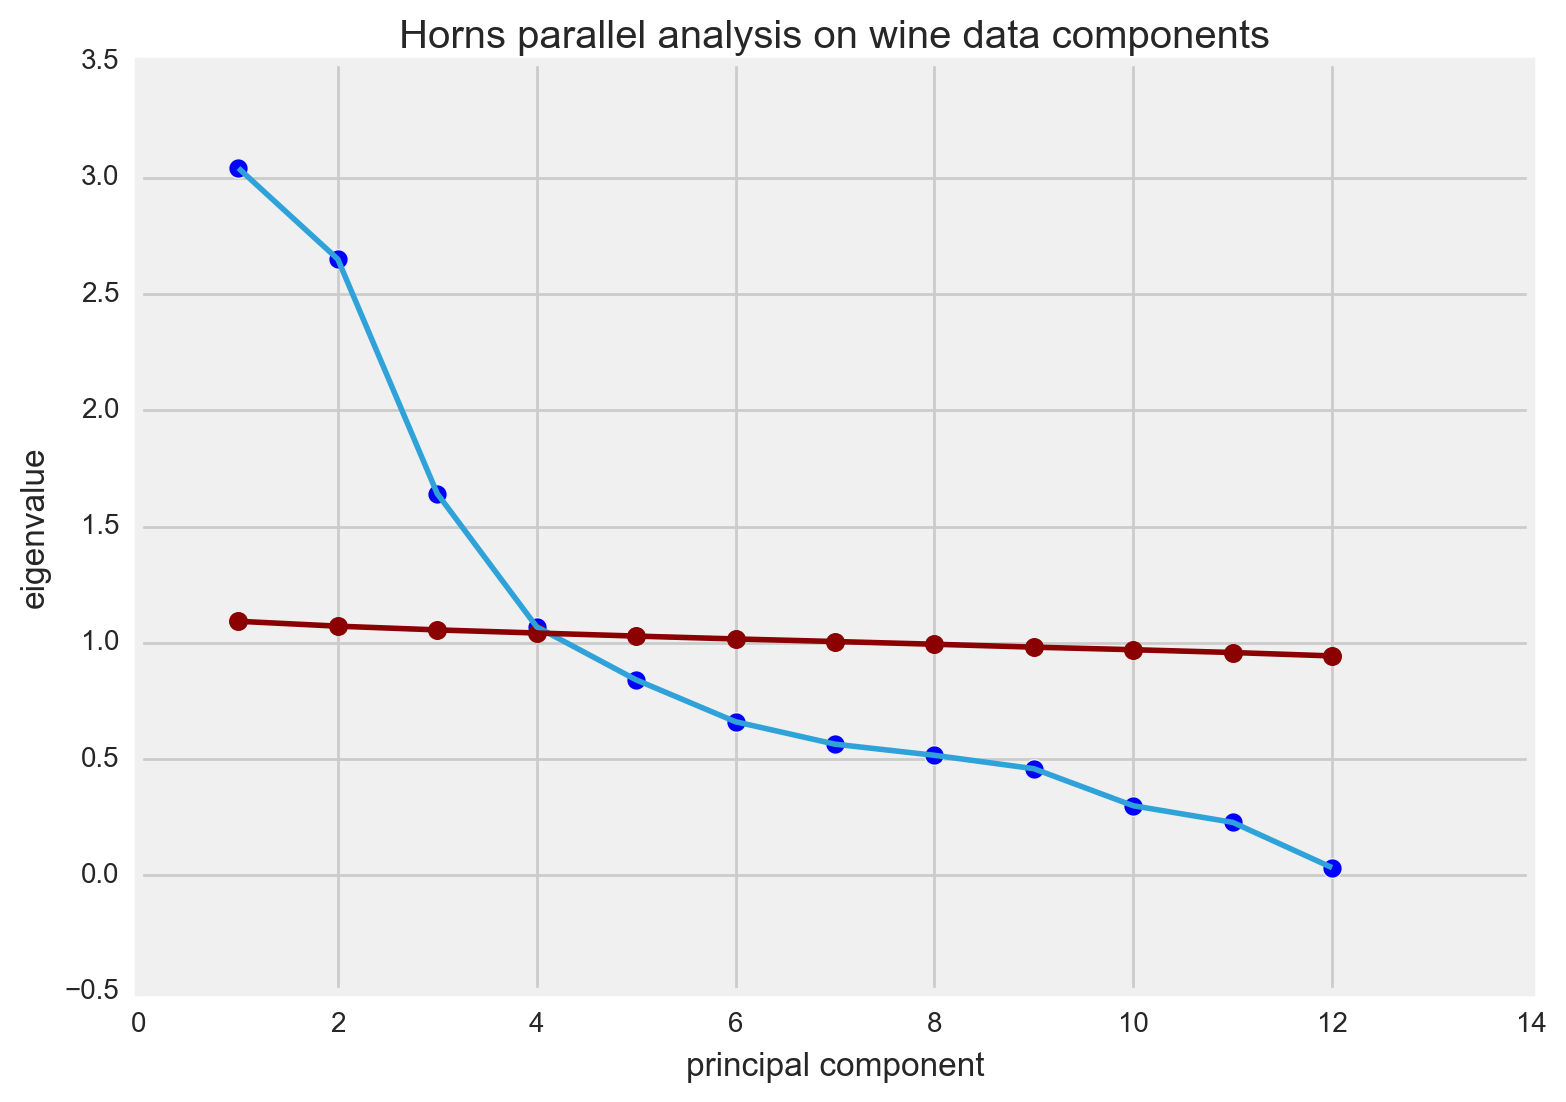

In [30]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(range(1, wine_cont.shape[1]+1), wine_pca.explained_variance_, lw=2)
ax.scatter(range(1, wine_cont.shape[1]+1), wine_pca.explained_variance_, s=50)

ax.plot(range(1, len(wine_pa)+1), wine_pa, lw=2, color='darkred')
ax.scatter(range(1, len(wine_pa)+1), wine_pa, s=40, color='darkred')


ax.set_title('Horns parallel analysis on wine data components')
ax.set_xlabel('principal component')
ax.set_ylabel('eigenvalue')
plt.show()

---

### Predict "red_wine" from original data and from PCA
- Use a logisitic regression and Knn

#### Original dataset = wine 
---

In [31]:
wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1


In [32]:
wine.shape

(6497, 13)

In [ ]:
## Explore the noise on the original data
## should you Standarized the data? 
## http://stats.stackexchange.com/questions/48360/is-standardization-needed-before-fitting-logistic-regression
sns.pairplot(data=wine, hue='red_wine')
plt.show()

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split

In [36]:
## Define your x and y
columns_ = wine.columns.tolist()
exclude_cols = ['red_wine']
y = wine.red_wine.values
X = wine[[i for i in columns_ if i not in exclude_cols]]
X = X.values

---
### Perform stratified cross-validation on a KNN classifier and logisitic regression.
- Gridsearch the best KNN parameters.
- Note: cross_val_score conveniently does stratification for you when you have a categorical target.

In [38]:
knn = KNeighborsClassifier()

params = {
    'n_neighbors':range(1,101),
    'weights':['uniform','distance']
}

knn_gs = GridSearchCV(knn, params, cv=5, verbose=1)
knn_gs.fit(X, y)

print knn_gs.best_params_
best_knn = knn_gs.best_estimator_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
{'n_neighbors': 10, 'weights': 'distance'}


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   30.3s finished


In [40]:
cv_indices = StratifiedKFold(y, n_folds=5)
## StratifiedKFold = Provides train/test indices to split data in train/test sets.
## http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

logreg = LogisticRegression()

lr_scores_test = []
lr_scores_train = []

knn_scores_test = []
knn_scores_train = []

for train_inds, test_inds in cv_indices:
    
    Xtr, ytr = X[train_inds, :], y[train_inds]
    Xte, yte = X[test_inds, :], y[test_inds]
    print 'Xtrain and ytrain shapes:\n', Xtr.shape, ytr.shape
    print 'Xtest and ytest shapes:\n', Xte.shape, yte.shape

    
    best_knn.fit(Xtr, ytr)
    knn_scores_test.append(best_knn.score(Xte, yte))
    knn_scores_train.append(best_knn.score(Xtr, ytr))
    '''best_knn.score = Returns the mean accuracy on the given test data and labels'''
    y_knn_predict  = best_knn.predict(Xte)
    
    
    logreg.fit(Xtr, ytr)
    lr_scores_test.append(logreg.score(Xte, yte))
    lr_scores_train.append(logreg.score(Xtr, ytr))
    '''logreg.score = Returns the mean accuracy on the given test data and labels'''
    y_log_predict = logreg.predict(Xte)
    
    
print "\n======\n"
print 'KNN accuracy scores on test:\n', knn_scores_test
print 'KNN mean of accuracy scores on test:\n', np.mean(knn_scores_test)
print 'KNN mean of accuracy scores on train :\n', np.mean(knn_scores_train)
print "\n======\n"
print 'Logistic Regression accuracy scores on test:\n', lr_scores_test
print 'Logistic Regression mean of accuracy scores on test:\n', np.mean(lr_scores_test)
print 'Logistic Regression mean of accuracy scores on train:\n', np.mean(lr_scores_train)

print "\n======\n"
print 'Baseline accuracy:\n ', np.mean(y)

Xtrain and ytrain shapes:
(5197, 12) (5197,)
Xtest and ytest shapes:
(1300, 12) (1300,)
Xtrain and ytrain shapes:
(5197, 12) (5197,)
Xtest and ytest shapes:
(1300, 12) (1300,)
Xtrain and ytrain shapes:
(5197, 12) (5197,)
Xtest and ytest shapes:
(1300, 12) (1300,)
Xtrain and ytrain shapes:
(5198, 12) (5198,)
Xtest and ytest shapes:
(1299, 12) (1299,)
Xtrain and ytrain shapes:
(5199, 12) (5199,)
Xtest and ytest shapes:
(1298, 12) (1298,)


KNN accuracy scores on test:
[0.92000000000000004, 0.94846153846153847, 0.94230769230769229, 0.94765204003079295, 0.94375963020030817]
KNN mean of accuracy scores on test:
0.9404361802
KNN mean of accuracy scores on train :
0.999692167087


Logistic Regression accuracy scores on test:
[0.97461538461538466, 0.97846153846153849, 0.99307692307692308, 0.97690531177829099, 0.98459167950693371]
Logistic Regression mean of accuracy scores on test:
0.981530167488
Logistic Regression mean of accuracy scores on train:
0.98187628271


Baseline accuracy:
  0.24611

#### PCA dataset = wine_pcs
---

In [41]:
wine_pcs.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,red_wine
0,-3.348438,0.568926,-2.727386,-0.223777,0.621408,-0.231602,0.124851,-0.000515,-0.646268,-0.069141,-0.104249,0.027643,1
1,-3.228595,1.197335,-1.998904,-0.377154,0.110313,1.945885,0.938413,0.425532,-0.114802,-0.449160,-0.258251,-0.014469,1
2,-3.237468,0.952580,-1.746578,-0.472791,0.225404,1.082561,0.451976,0.411350,-0.120635,-0.272888,-0.081613,0.053961,1


In [42]:
## Define your x and y
## For your X = only use the number of PCA's that have the greatest explanatory power

columns_ = wine_pcs.columns.tolist()
exclude_cols = ['red_wine', 'PC5', 'PC6','PC7','PC8','PC9','PC10','PC11','PC12']

ypc = wine_pcs.red_wine.values

Xpc = wine_pcs[[i for i in columns_ if i not in exclude_cols]]
Xpc = Xpc.values

---
### Perform stratified cross-validation on a KNN classifier and logisitic regression.
- Gridsearch the best KNN parameters.
- Note: cross_val_score conveniently does stratification for you when you have a categorical target.

In [43]:
knn = KNeighborsClassifier()

params = {
    'n_neighbors':range(1,101),
    'weights':['uniform','distance']
}

knn_gs_pc = GridSearchCV(knn, params, cv=5, verbose=1)
knn_gs_pc.fit(Xpc, ypc)

print knn_gs_pc.best_params_
best_knn_pc = knn_gs_pc.best_estimator_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
{'n_neighbors': 23, 'weights': 'distance'}


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   34.6s finished


In [52]:
cv_indices_pc = StratifiedKFold(ypc, n_folds=5)

logreg_pc = LogisticRegression()

lr_scores_test_pc = []
lr_scores_train_pc = []

knn_scores_test_pc = []
knn_scores_train_pc = []

for train_inds, test_inds in cv_indices_pc:
    
    Xtr_pc, ytr_pc = Xpc[train_inds, :], ypc[train_inds]
    Xte_pc, yte_pc = Xpc[test_inds, :], ypc[test_inds]
    print 'Xtrain and ytrain shapes:\n', Xtr_pc.shape, ytr_pc.shape
    print 'Xtest and ytest shapes:\n', Xte_pc.shape, yte_pc.shape

    
    best_knn_pc.fit(Xtr_pc, ytr_pc)
    knn_scores_test_pc.append(best_knn_pc.score(Xte_pc, yte_pc))
    knn_scores_train_pc.append(best_knn_pc.score(Xtr_pc, ytr_pc))
    '''best_knn.score = Returns the mean accuracy on the given test data and labels'''
    y_knn_predict_pc  = best_knn_pc.predict(Xte_pc)

    
    
    logreg_pc.fit(Xtr_pc, ytr_pc)
    lr_scores_test_pc.append(logreg_pc.score(Xte_pc, yte_pc))
    lr_scores_train_pc.append(logreg_pc.score(Xtr_pc, ytr_pc))
    '''logreg.score = Returns the mean accuracy on the given test data and labels'''
    y_log_predict_pc = logreg_pc.predict(Xte_pc)
    
print "\n======\n"
print 'KNN accuracy scores on test:\n', knn_scores_test_pc
print 'KNN mean of accuracy scores on test:\n', np.mean(knn_scores_test_pc)
print 'KNN mean of accuracy scores on train :\n', np.mean(knn_scores_train_pc)
print "\n======\n"
print 'Logistic Regression accuracy scores on test:\n', lr_scores_test_pc
print 'Logistic Regression mean of accuracy scores on test:\n', np.mean(lr_scores_test_pc)
print 'Logistic Regression mean of accuracy scores on train:\n', np.mean(lr_scores_train_pc)

print "\n======\n"
print 'Baseline accuracy:\n ', np.mean(ypc)

Xtrain and ytrain shapes:
(5197, 4) (5197,)
Xtest and ytest shapes:
(1300, 4) (1300,)
Xtrain and ytrain shapes:
(5197, 4) (5197,)
Xtest and ytest shapes:
(1300, 4) (1300,)
Xtrain and ytrain shapes:
(5197, 4) (5197,)
Xtest and ytest shapes:
(1300, 4) (1300,)
Xtrain and ytrain shapes:
(5198, 4) (5198,)
Xtest and ytest shapes:
(1299, 4) (1299,)
Xtrain and ytrain shapes:
(5199, 4) (5199,)
Xtest and ytest shapes:
(1298, 4) (1298,)


KNN accuracy scores on test:
[0.99153846153846159, 0.9869230769230769, 0.99076923076923074, 0.98152424942263283, 0.98921417565485359]
KNN mean of accuracy scores on test:
0.987993838862
KNN mean of accuracy scores on train :
0.999692167087


Logistic Regression accuracy scores on test:
[0.9869230769230769, 0.98461538461538467, 0.98615384615384616, 0.98152424942263283, 0.98459167950693371]
Logistic Regression mean of accuracy scores on test:
0.984761647324
Logistic Regression mean of accuracy scores on train:
0.986532208318


Baseline accuracy:
  0.246113590888


In [45]:
'''the mean of the accuracy score on the test data has a significant increase from '''
print 'KNN mean of accuracy scores on test:\n', np.mean(knn_scores_test)
print 'KNN mean of accuracy scores on test PC:\n', np.mean(knn_scores_test_pc)
print "Increase of accuracy of:", (np.mean(knn_scores_test_pc) - np.mean(knn_scores_test))

KNN mean of accuracy scores on test:
0.9404361802
KNN mean of accuracy scores on test PC:
0.987993838862
Increase of accuracy of: 0.0475576586616


---
### Look at the confusion Matrix for each of your classification methods.

In [46]:
# print wine.red_wine.value_counts()
# print wine_pcs.red_wine.value_counts()

In [47]:
# Load Confusion Matrix 
from sklearn.metrics import confusion_matrix

In [48]:
def confus_mat(ytrue, ypred_method, what_predict):
    what_predict = str(what_predict)
    confmat = confusion_matrix(y_true=ytrue, y_pred=ypred_method)
    confusion = pd.DataFrame(confmat, index=['is_not_' + what_predict, 'is_' + what_predict],
                         columns=['predicted_is_not_'+ what_predict, 'predicted_is_'+what_predict])
    return confusion

In [49]:
# Load Classification Report
from sklearn.metrics import classification_report

In [50]:
def class_report(ytrue, ypred):
    cls_rep = classification_report(yte, y_knn_predict)
    print cls_rep

In [51]:
## Confuion Matrix for knn
confus_mat(yte, y_knn_predict, 'red_wine')

,predicted_is_not_red_wine,predicted_is_red_wine
is_not_red_wine,960,19
is_red_wine,54,265


In [38]:
## Classification report for knn
class_report(yte, y_knn_predict)

             precision    recall  f1-score   support

          0       0.95      0.98      0.96       979
          1       0.93      0.83      0.88       319

avg / total       0.94      0.94      0.94      1298



In [39]:
## Confusion Matrix for logistic
confus_mat(yte, y_log_predict, 'red_wine')

,predicted_is_not_red_wine,predicted_is_red_wine
is_not_red_wine,975,4
is_red_wine,16,303


In [40]:
## Classification report for logistic
class_report(yte, y_log_predict)

             precision    recall  f1-score   support

          0       0.95      0.98      0.96       979
          1       0.93      0.83      0.88       319

avg / total       0.94      0.94      0.94      1298



In [41]:
## Confuion Matrix for knn with PC
confus_mat(yte, y_knn_predict_pc, 'red_wine')

,predicted_is_not_red_wine,predicted_is_red_wine
is_not_red_wine,973,6
is_red_wine,8,311


In [42]:
## Classification report for knn with PC
class_report(yte, y_knn_predict_pc)

             precision    recall  f1-score   support

          0       0.95      0.98      0.96       979
          1       0.93      0.83      0.88       319

avg / total       0.94      0.94      0.94      1298



In [43]:
## Confuion Matrix for log with PC
confus_mat(yte, y_log_predict_pc, 'red_wine')

,predicted_is_not_red_wine,predicted_is_red_wine
is_not_red_wine,972,7
is_red_wine,13,306


In [44]:
## Classification report for knn with PC
class_report(yte, y_log_predict_pc)

             precision    recall  f1-score   support

          0       0.95      0.98      0.96       979
          1       0.93      0.83      0.88       319

avg / total       0.94      0.94      0.94      1298



#### Here is what the classification report is telling us
Each of the columns indicate an important metric for evaluating classification model performance.

|   |   |
|---|---|
|**precision** | Ability of the classifier to avoid labeling a class as a member of another class. <br><br> `Precision = True Positives / (True Positives + False Positives)`<br><br>_A precision score of 1 indicates that the classifier never mistakenly classified the current class as another class.  precision score of 0 would mean that the classifier misclassified every instance of the current class_ |
|**recall**    | is the ability of the classifier to correctly identify the current class. <br><br>`Recall = True Positives / (True Positives + False Negatives)`<br><br>A recall of 1 indicates that the classifier correctly predicted all observations.  0 means the classifier predicted all observations of the current class incorrectly.|
|**f1-score** | is the harmonic mean of the precision and recall. The harmonic mean is used here rather than the more conventional arithmetic mean because the harmonic mean is more appropriate for averaging rates. <br><br>`F1-Score = 2 * (Precision * Recall) / (Precision + Recall)` <br><br>_The f1-score's best value is 1 and worst value is 0, like the precision and recall scores. It is a useful metric for taking into account both measures at once._ |
|**support** | is simply the number of observations of the labelled class.|